# SciPy

[SciPy](https://scipy.org/) is a Python library that provides algorithms and functions for scientific computing beyond what you can do in NumPy.

The library is broken down as follows:
- Clustering
- Constants
- Fourier Transforms
- Numerical Integration
- Interpolation
- File I/O
- Linear Algebra
- Image Processing
- Optimization
- Signal Processing
- Sparse Matrices
- Spatial Algorithms
- Special Math Functions
- Statistics

You can find more documentation here: [https://docs.scipy.org/doc/scipy/index.html](https://docs.scipy.org/doc/scipy/index.html)

In [106]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from rich.pretty import pprint as pp

## Optimization

Optimization is about finding the input to a function that results in the smallest output.
This function can have one varaible like $f(x)=2x+x^2$, or it can have multiple variables like $f(x,y)=x^2+y^2$. 

If we have more than one variable, we use x for all the vaiables and index the variables.

$$
f(x, y) = x^2 + y^2\\
f(x_0, x_1) = x_0^2 + x_1^2
$$

This is helpful when we have a large number of variables or vectors.

For example:
$$
X = [x_0, x_1, x_2, ..., x_n]\\
f(X) = 10^2 + \sum_{i=1}^n x_i^2 - 10^2 \cos(2\pi x_i)
$$

Let look at a simple example:

The minimum of $f(x)=x^2+1$ is $x = 0$.

It is clear when we plot the function that x = 0 will produce the smallet output value.

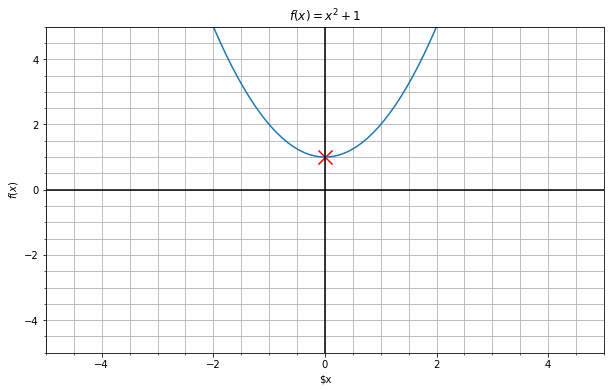

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
# f(x)=x^2+1$ is $(x) = (0)
def f(x):
    return x**2+1

x = np.linspace(-5, 5, 100)
y = f(x)
ax.plot(x, y)
ax.scatter(0, f(0), color='r', marker='x', s=200)

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

ax.set_xlabel('$x')
ax.set_ylabel('$f(x)$')
ax.set_title('$f(x)=x^2+1$')
ax.grid(True, which='both')
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')
# show minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.show()

There are some cases where there is no global minimum. In these functions, you can keep increasing the value of x and keep getting smaller and smaller output values.

For example, the function $f(x)=3x^3-4x^2+2$ has no global minimum. If you keep decreasing x, you will get a decreasing output value.

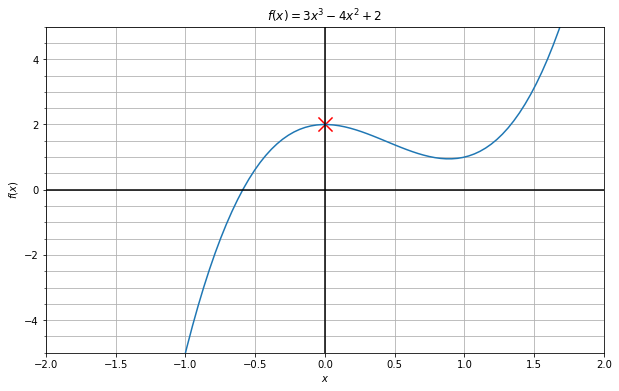

In [34]:
# $f(x)=3x^3-4x^2+2$
def f(x):
    return 3*x**3-4*x**2+2

x = np.linspace(-2, 2, 100)
y = f(x)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y)
ax.scatter(0, f(0), color='r', marker='x', s=200)

ax.set_xlim(-2, 2)
ax.set_ylim(-5, 5)

ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_title('$f(x)=3x^3-4x^2+2$')
ax.grid(True, which='both')
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')
# show minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.show()

In this case we do a bounded optimization. In a bounded optimization, we set limits for what values the input variables can be.

For example, we can do an optmization for $f(x)=3x^3-4x^2+2$ with the bounds $-1 \leq x \leq 1$ which can also be written as $x \in [-1, 1]$.

In this case, the minimum is $x = -1$.

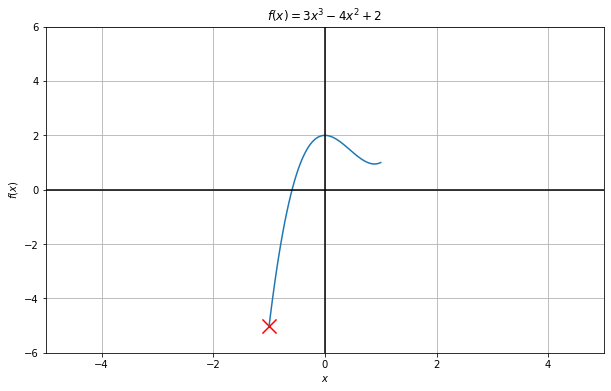

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
def f(x):
    return 3*x**3-4*x**2+2

x = np.linspace(-1, 1, 100)
y = f(x)

ax.plot(x, y)
ax.scatter(-1, f(-1), color='r', marker='x', s=200)

ax.set_xlim(-5, 5)
ax.set_ylim(-6, 6)

ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_title('$f(x)=3x^3-4x^2+2$')
ax.grid(True, which='both')
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')

plt.show()

It is also possible to have multiple minimums.

For example, the function $f(x) = -5x^4 + 5x^6 + x^2$ has global minimums at $x = -\sqrt{\frac{1}{15}(5+\sqrt{10})}$ and $x = \sqrt{\frac{1}{15}(5+\sqrt{10})}$.


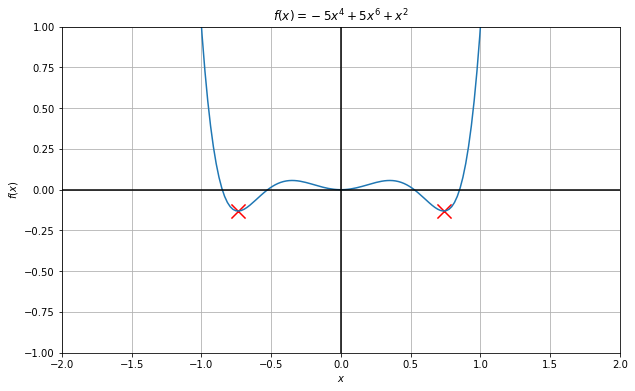

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
def f(x):
    return -5*x**4 + 5*x**6+x**2


x = np.linspace(-2, 2, 200)
y = f(x)

ax.plot(x, y)
# $x = -\sqrt{\frac{1}{15}(5+\sqrt{10})}$ and $x = \sqrt{\frac{1}{15}(5+\sqrt{10})}$
ax.scatter(-np.sqrt(1/15*(5+np.sqrt(10))), f(-np.sqrt(1/15*(5+np.sqrt(10)))), color='r', marker='x', s=200)
ax.scatter(np.sqrt(1/15*(5+np.sqrt(10))), f(np.sqrt(1/15*(5+np.sqrt(10)))), color='r', marker='x', s=200)



ax.set_xlim(-2, 2)
ax.set_ylim(-1, 1)


ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_title('$f(x)=-5x^4+5x^6+x^2$')
ax.grid(True, which='both')
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')


You can also do optmization with 2D imputs and visualize them using countour plots, psudo-color plots, and surface plots.

Here is example with the Ackley function in 2D:

$$
f(x_0, x_1) = -20\exp(-0.2(x_0^2 + x_1^2)^0.5) - \exp(0.5(cos(2\pi x_0) + cos(2\pi x_1))) + 20 + \exp(1)\\
\text{Global minimum} = (0, 0)
$$

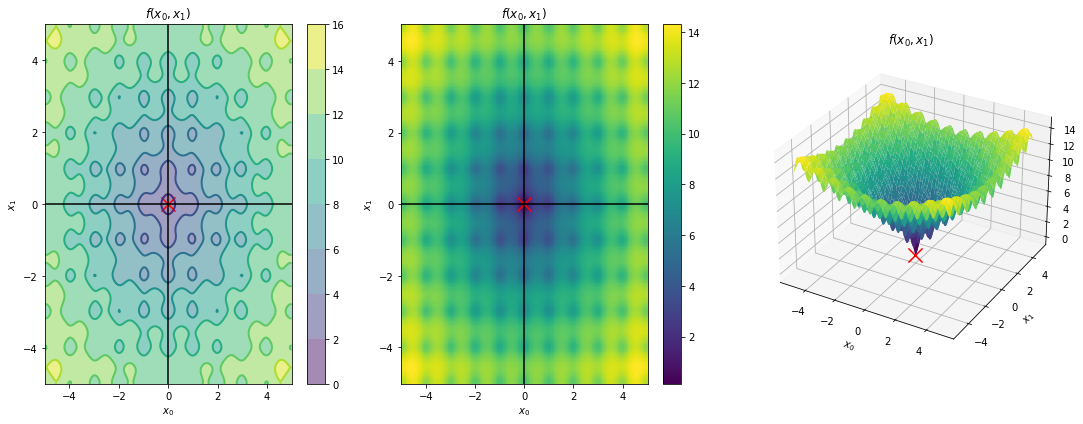

In [55]:
# Ackley function in 2D with x_0 and x_1 as the two variables
def f(x):
    return -20*np.exp(-0.2*np.sqrt(0.5*(x[0]**2+x[1]**2))) - np.exp(0.5*(np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1]))) + np.exp(1) + 20

X_0, X_1 = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
F_X = f([X_0, X_1])

fig, axs = plt.subplots(1, 3, figsize=(15,6))

# contour plot with lines and labels
cs_f = axs[0].contourf(X_0, X_1, F_X, cmap='viridis', alpha=0.5)
cs = axs[0].contour(X_0, X_1, F_X, linewidths=2)
axs[0].scatter(0, 0, color='r', marker='x', s=200)
axs[0].set_xlabel('$x_0$')
axs[0].set_ylabel('$x_1$')
axs[0].set_title('$f(x_0, x_1)$')
axs[0].axhline(y=0, color='black')
axs[0].axvline(x=0, color='black')
# add color bar
cbar = fig.colorbar(cs_f, ax=axs[0])

# pcolor plot
pcolor_plot = axs[1].pcolormesh(X_0, X_1, F_X, cmap='viridis', shading='auto')
axs[1].scatter(0, 0, color='r', marker='x', s=200)
axs[1].set_xlabel('$x_0$')
axs[1].set_ylabel('$x_1$')
axs[1].set_title('$f(x_0, x_1)$')
axs[1].axhline(y=0, color='black')
axs[1].axvline(x=0, color='black')
# add color bar
cbar = plt.colorbar(pcolor_plot, ax=axs[1])

# make axes[2] a 3d plot
axs[2].remove()
axs[2] = fig.add_subplot(1,3,3,projection='3d')
axs[2].plot_surface(X_0, X_1, F_X, cmap='viridis')
axs[2].scatter(0, 0, 0, color='r', marker='x', s=200)
axs[2].set_xlabel('$x_0$')
axs[2].set_ylabel('$x_1$')
axs[2].set_title('$f(x_0, x_1)$')


plt.tight_layout()
plt.show()

These exaples are a little simplistic. In the real world, you will probably have functions that are more complex to find the minimum analytically or have to many varaibles to be able to plot the function. In these cases you want to let the computer find the minimum for you. You can do this by using the functions that can be found in `scipy.optimize`.

Let try some examples.

In [56]:
from scipy.optimize import minimize, minimize_scalar

Lets do a simple example and use `scipy.optimize.minimize` to find the minimum. Scipy also has a function `scipy.optimize.minimize_scalar` that can be used to find the minimum if you only have a single variable but its not very flexible.

$$
f(x) = -\frac{\sin\left(\pi x\right)}{\pi x}\operatorname{abs}\left(\cos\left(\pi x\right)\right)\\
\text{Global minimum}: x = 0
$$


      fun: -0.03747451998259736
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.79813978e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([4.24403826])


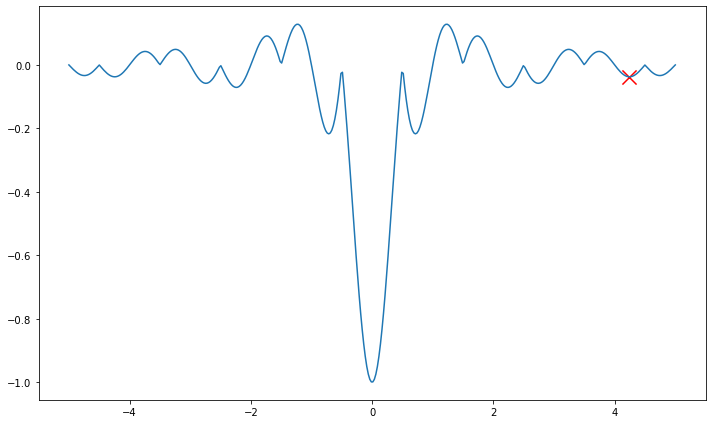

In [94]:
def f(x):
    # f(x) = -\frac{\sin\left(\pi x\right)}{\pi x}\operatorname{abs}\left(\cos\left(\pi x\right)\right)\\
    return -np.sin(np.pi*x)/(np.pi*x)*np.abs(np.cos(np.pi*x))

bounds = [(-5, 5)]
x_0 = [4]

# minimize_scalar
res = minimize(f, bounds=bounds, x0=x_0)
print(res)

# plot f(x)
x = np.linspace(-5, 5, 400)
y = f(x)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y)
ax.scatter(res.x, f(res.x), color='r', marker='x', s=200)
plt.tight_layout()
plt.show()


That doesn't seem to work. It gets stuck at the local minimum. There are several ways to fix this. If we know roughly where global minimum is, we can make our bounds smaller and closer to where we think the global minimum is. We can also run the optmization multiple times with random starting guessed and pick the best minimum. Lets try that.

Minimums:


[
│   {'x': array([-4.14548439e-09]), 'y': array([-1.])},
│   {'x': array([-3.5]), 'y': array([1.42857136e-09])},
│   {'x': array([4.24403383]), 'y': array([-0.03747452])},
│   {'x': array([-2.74076789]), 'y': array([-0.0579718])},
│   {'x': array([-4.49198062e-09]), 'y': array([-1.])},
│   {'x': array([2.23870281]), 'y': array([-0.07091346])},
│   {'x': array([3.5]), 'y': array([1.42857128e-09])},
│   {'x': array([-4.91312418e-09]), 'y': array([-1.])},
│   {'x': array([-0.71514823]), 'y': array([-0.21723363])},
│   {'x': array([2.23870427]), 'y': array([-0.07091346])}
]

Best minimum:


{'x': array([-4.14548439e-09]), 'y': array([-1.])}

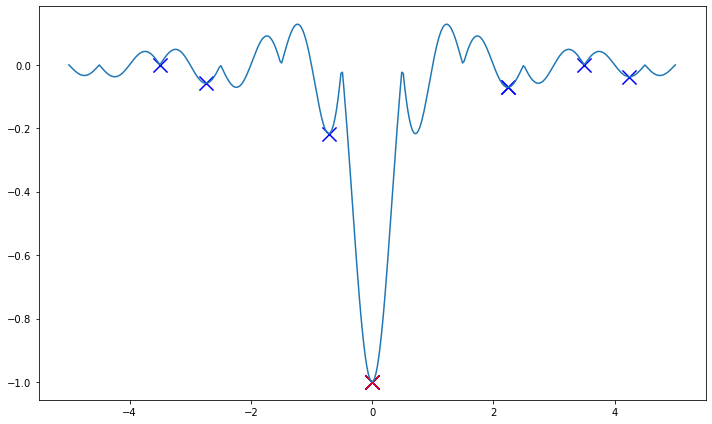

In [135]:
minimums = []
for i in range(10):
    random_start_x = [np.random.uniform(b[0], b[1]) for b in bounds]
    res = minimize(f, bounds=bounds, x0=random_start_x)
    minimums.append({
        'x': res.x,
        'y': f(res.x),
    })

best_min = min(minimums, key=lambda x: x['y'])
print(f"Minimums:")
pp(minimums)
print(f"Best minimum:")
pp(best_min)


fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y)
ax.scatter([m["x"] for m in minimums], [m["y"] for m in minimums], color='blue', marker='x', s=200)
ax.scatter(best_min['x'], best_min['y'], color='r', marker='x', s=200)
plt.tight_layout()
plt.show()

Lets try a 2D optimization with the Ackley function.

$$
f(x_0, x_1) = -20\exp(-0.2(x_0^2 + x_1^2)^0.5) - \exp(0.5(cos(2\pi x_0) + cos(2\pi x_1))) + 20 + \exp(1)\\
\text{Global minimum} = (0, 0)
$$

xk: [-0.75293441  4.92746099]
xk: [-1.88493713  5.        ]
xk: [-2.01988731  4.99404872]
xk: [-1.98413314  4.95647757]
xk: [-1.98717273  4.97969495]
xk: [-1.99209735  4.97661023]
xk: [-1.99073987  4.9768043 ]
xk: [-1.99076529  4.97684684]
xk: [-1.99076489  4.97684384]


│     fun: 10.64502748371435
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
│     jac: array([-3.55271370e-07, -1.77635685e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
│    nfev: 39
│     nit: 9
│    njev: 13
   status: 0
  success: True
│   │   x: array([-1.99076489,  4.97684384])

array([-1.99076489,  4.97684384])

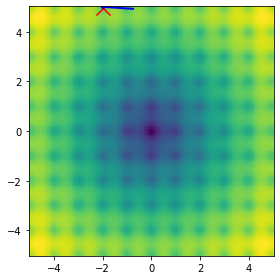

In [182]:
# Lets try a 2D optimization with the Ackley function.

def f(x):
    return -20*np.exp(-0.2*np.sqrt(0.5*(x[0]**2+x[1]**2))) - np.exp(0.5*(np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1]))) + np.exp(1) + 20

bounds = [(-5, 5), (-5, 5)]
x0 = [np.random.uniform(b[0], b[1]) for b in bounds]


tracking_array = []

def progress_callback(xk):
    print(f"xk: {xk}")
    tracking_array.append(xk)



res = minimize(f, bounds=[(-5, 5), (-5, 5)], x0=x0, callback=progress_callback)
pp(res)
pp(res.x)

tracking_array = np.array(tracking_array)

X_0, X_1 = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
F_X = f([X_0, X_1])

fig, ax = plt.subplots(figsize=(4,4))
ax.pcolormesh(X_0, X_1, F_X, cmap='viridis', shading='auto')
ax.scatter(res.x[0], res.x[1], color='r', marker='x', s=200)
ax.plot(tracking_array[:,0], tracking_array[:,1], color='blue', linewidth=2)
plt.tight_layout()
plt.show()



We encounterd the same convergence issue as before. This is because `scipy.optimize.minimize` is a **local optimization** algorithm. It will converge to the local minimum. If we want to find the **global minimum**, we need to run a global optimization algorithm.

Our nieve approach is to run the optimization multiple times with random starting guesses. However this is not very efficient. SciPy has functions to perfrom global optimization more efficiently. Let try that out.

We are going to use an apprach called basin hopping. It is used to find minumums in very rough and high dimensional spaces. For example finding the lowest energy configations of molecules.

<!-- Inser image -->
![https://aip.scitation.org/action/showOpenGraphArticleImage?doi=10.1063/1.4755994&id=images/medium/1.4755994.figures.f1.gif](https://aip.scitation.org/action/showOpenGraphArticleImage?doi=10.1063/1.4755994&id=images/medium/1.4755994.figures.f1.gif)

│   │   │   │   │   │   fun: 9.51544620875211e-10
 lowest_optimization_result:       fun: 9.51544620875211e-10
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
│     jac: array([2.66907598, 2.66461093])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
│    nfev: 279
│     nit: 24
│    njev: 93
   status: 2
  success: False
│   │   x: array([-2.30053993e-10, -2.45469074e-10])
│   │   │   │   │   message: ['requested number of basinhopping iterations completed successfully']
│     minimization_failures: 29
│   │   │   │   │      nfev: 20214
│   │   │   │   │   │   nit: 100
│   │   │   │   │      njev: 6738
│   │   │   │   │   success: False
│   │   │   │   │   │     x: array([-2.30053993e-10, -2.45469074e-10])

array([-2.30053993e-10, -2.45469074e-10])

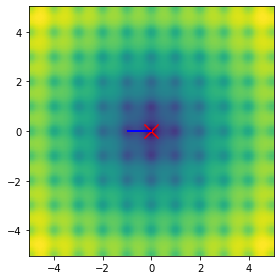

In [189]:
from scipy.optimize import basinhopping

progress_array = []
def progress_callback(x, f, accept):
    progress_array.append(x)


x0 = [np.random.uniform(b[0], b[1]) for b in bounds]
res = basinhopping(f, x0, minimizer_kwargs={"bounds": bounds}, niter=100, callback=progress_callback)
pp(res)
pp(res.x)

progress_array = np.array(progress_array)

fig, ax = plt.subplots(figsize=(4,4))
ax.pcolormesh(X_0, X_1, F_X, cmap='viridis', shading='auto')
ax.scatter(res.x[0], res.x[1], color='r', marker='x', s=200)
ax.plot(progress_array[:,0], progress_array[:,1], color='blue', linewidth=2)
plt.tight_layout()
plt.show()